# Type charts

By **Franklin Oliveira**

-----
This notebook contains all code necessary to make the "type" charts from `repteis` database. Here you'll find some basic data treatment and charts' code. 

Database: <font color='blue'>'Compilacao Livros Repteis - 2 a 10 - 2020_04_28.xls'</font>.

In [5]:
import datetime
import numpy as np
import pandas as pd

from collections import defaultdict

# pacotes para visualização rápida
import seaborn as sns
import matplotlib.pyplot as plt

# pacote para visualização principal
import altair as alt

# habilitando renderizador para notebook
# alt.renderers.enable('notebook')
alt.renderers.enable('default')


# desabilitando limite de linhas
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Importing data...

In [6]:
excel = pd.ExcelFile('Compilacao Livros Repteis - 2 a 10 - 2020_04_28.xls')
sheet_name = excel.sheet_names

print('The excel file contains the following sheets:', sheet_name)
print('\nDatabase is in sheet:', sheet_name[0])

The excel file contains the following sheets: ['Repteis-2020-02-11-csv']

Database is in sheet: Repteis-2020-02-11-csv


In [7]:
db = excel.parse(sheet_name[0], sep=';', encoding='utf-8-sig')

# p.s.: I'm parsing a pre-treated file provided by Asla
#db = pd.read_excel('db.csv', sep=',', encoding='utf-8-sig', low_memory=False)
print(f'The database has {db.shape[0]} rows and {db.shape[1]} columns.')

The database has 23119 rows and 114 columns.


In [8]:
# copying database to another variable to make a few changes keeping the original intact
repteis = db.copy()

<br>

<font color='red' size='5'>**p.s.:** We were told by the Curator that some names in this database may remain confidential. So, I'm gonna skip this step for now until we know how to treat this data appropriately </font>

### Name columns

`DeterminatorFirstName1` e `DeterminatorLastName1`

#### treating determiner's name 

In this step, we're going to put together 'determinator's' first and last name. 

`DeterminatorFirstName1` + `DeterminatorLastName1`

Just concatenating those two columns is not satisfactory because there's some dirt in these data columns. So, let's begin by treating them...

In [9]:
# repteis['DeterminatorFirstName1'].value_counts()
# repteis['DeterminatorLastName1'].value_counts()

In [10]:
def treat_names(name, pos='first'):
    '''
    Treat names keeping NaN as such.
    
    Arguments: 
        - name: name to be treated. 
        - pos (str): name position. One of ['first', 'last']
    '''
    if type(name) == str and pos == 'first':     # first name
        
        if len(name.split(' ')) > 1:             # treats composite names (+ 1 name)
            return str(name).strip().split(' ')[0].capitalize()
        else:
            return str(name).strip().capitalize()
    
    elif type(name) == str and pos == 'last':    # last name
        
        if len(name.split(' ')) > 1:             # treats composite last name (+ 1 surname)
            return str(name).strip().split(' ')[-1].capitalize()
        else:
            return str(name).strip().capitalize()   
    else:
        return name

applying function to the two column names

In [11]:
#crustaceas['Determiner First Name1'] = crustaceas['Determiner First Name1'].apply(treat_names)
# crustaceas['Determiner First Name1'].value_counts()

In [12]:
#crustaceas['Determiner Last Name1'] = crustaceas['Determiner Last Name1'].apply(lambda x:
#                                                                treat_names(x, pos='last'))
# crustaceas['Determiner Last Name1'].value_counts()

In [13]:
# creating column with First and Last name for identification
#crustaceas['Determiner First_and_Last Name'] = crustaceas['Determiner First Name1'] + ' ' + crustaceas['Determiner Last Name1']

<br>

## Adjusting columns names

### removing '\n'

In [14]:
repteis.columns = [str(col).replace(r'\n','') for col in repteis.columns]

#### closer look on some columns...

In [15]:
for col in repteis.columns:
    print('-', col)

- NumeroDeCatalogo
- NumeroDeCampo
- DataDeEntrada
- DataDaDeterminacao
- Kingdom
- Phylum
- Class
- Ordem
- Familia
- Genero_ent
- Qualificador_ent
- Especie_ent
- Subespecie_ent
- Type Status 1
- Current 1
- Determined Date 2
- Class2
- Order2
- Family2
- Genero_atual
- Qualificador_atual
- Especie_atual
- Subespecie_atual
- NotasTaxonomicas
- Current 2
- DeterminatorLastName1
- DeterminatorFirstName1
- DeterminatorMiddleInitial1
- DeterminatorLastName2
- DeterminatorFirstName2
- DeterminatorMiddleInitial2
- DeterminationRemark
- AssociatedTaxa
- TypeOf
- ColecaoEspecial
- DataColetaInicial
- DataColetaFinal
- Complemento
- NomeDaLocalidade
- Municipio
- EstadoOuProvincia
- Pais
- Continente
- LocalityRemark
- UtmDatum
- UtmZone
- UtmEasting
- UtmNorthing
- VerbatimLatitude
- VerbatimLongitude
- Lat
- Long
- PrecisaoDaCoordenada
- GrupoDeColeta
- MinAltitude
- MaxAltitude
- CollectingInformationRemark
- CollectorLastName1
- CollectorFirstName1
- CollectorMiddleName1
- CollectorLastNa

In [16]:
repteis['Especie_atual'].value_counts()

torquatus       1403
ocellifera       779
jararaca         635
hispidus         607
ameiva           558
                ... 
nurinus            1
leucosticta        1
superciliosa       1
0                  1
aurata             1
Name: Especie_atual, Length: 803, dtype: int64

<font size='5'>**Equivalência de colunas:** </font>

**Nome diferente:** <br>
- Species1: Especie_ent ou Especie_atual
- Species Author1: ?
- Type Status1: Type Status 1
- Qualifier1: Qualificador_ent Qualificador_atual
- Determiner First Name1: DeterminatorFirstName1
- Determiner Middle1: DeterminatorMiddleInitial1
- Determiner Last Name1: DeterminatorLastName1
- Determined Date1: DataDaDeterminacao

In [17]:
repteis[['Especie_atual', 'Type Status 1', 'Qualificador_atual', 'DeterminatorFirstName1',
       'DeterminatorMiddleInitial1', 'DeterminatorLastName1', 'DataDaDeterminacao']]

,Especie_atual,Type Status 1,Qualificador_atual,DeterminatorFirstName1,DeterminatorMiddleInitial1,DeterminatorLastName1,DataDaDeterminacao
0,geoffroanus,NaN,-,L.,M.F.,Cunha,00/11/2018
1,suspectum,NaN,NaN,NaN,NaN,NaN,NaN
2,alba,NaN,NaN,NaN,NaN,NaN,NaN
3,corais,NaN,NaN,NaN,NaN,NaN,NaN
4,bottae,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23114,ibiboboca,NaN,NaN,P.,NaN,Passos,00/10/2016
23115,ibiboboca,NaN,NaN,P.,NaN,Passos,00/10/2016
23116,quadricarinatus,NaN,NaN,P.,NaN,Passos,00/10/2016
23117,bicarinatus,NaN,NaN,P.,NaN,Pinna,00/10/2016


<br>

## preparing data for charts...

### Column: `Type Status1`

contains info on species type

In [18]:
repteis['Type Status 1'].value_counts().head()  # essa coluna está vazia!?

Series([], Name: Type Status 1, dtype: int64)

#### Let's begin cleaning this data and lowering all cases.

In [19]:
#repteis['Type Status 1'] = repteis['Type Status 1'].str.strip().str.lower().str.capitalize()

In [20]:
repteis['Type Status 1'].value_counts().head()

Series([], Name: Type Status 1, dtype: int64)

### preparing taxonomy columns

`Kingdom` - `Phylum` - `Class` - `Ordem` - `Familia` - `Genero_ent`- `Genero_atual` - `Especie_ent` - `Especie_atual`

**Colunas faltando:**
- `Subphylum1`
- `Subclass1`
- `Infraclass1`
- `Superorder1`
- `Suborder1` 
- `Infraorder1` 
- `Superfamily1`
- `Subfamily1` 
- `Tribe1`

In [21]:
taxon_columns = ['Kingdom', 'Phylum', 'Class', 'Ordem', 'Familia', 'Genero_ent',
                 'Genero_atual', 'Especie_ent', 'Especie_atual', 'Subespecie_ent',
                 'Subespecie_atual']  # selecting taxonomy columns

# defining function
def treat_str(x):
    return str(x).lower().capitalize().strip()

# applying treatment
for col in taxon_columns:
    print(f'Adjusting column {col}')
    repteis[col] = repteis[col].apply(treat_str)

Adjusting column Kingdom
Adjusting column Phylum
Adjusting column Class
Adjusting column Ordem
Adjusting column Familia
Adjusting column Genero_ent
Adjusting column Genero_atual
Adjusting column Especie_ent
Adjusting column Especie_atual
Adjusting column Subespecie_ent
Adjusting column Subespecie_atual


### adding `Genero` and `Especie`together (they completely identify each animal's species)

In [22]:
repteis['genero_e_especie_ent'] = repteis['Genero_ent'] + ' ' + repteis['Especie_ent']
repteis['genero_e_especie_atual'] = repteis['Genero_atual'] + ' ' + repteis['Especie_atual']

repteis['genero_e_especie_ent'] = repteis['genero_e_especie_ent'].str.lower().str.capitalize()
repteis['genero_e_especie_atual'] = repteis['genero_e_especie_atual'].str.lower().str.capitalize()

<br>

### Collecting date (year) and sclicing main DB to a smaller dataset 

Columns: `Determined Date1` - `Class1` - `Kingdom` and more...

In [23]:
# slicing main database (repteis)
Table = repteis[['NumeroDeCatalogo','DataDeEntrada','DataDaDeterminacao','DataColetaInicial','Class','Kingdom', 
                    'Genero_ent', 'Genero_atual', 'Especie_ent', 'Especie_atual','Subespecie_atual','Type Status 1',
                    'DeterminatorFirstName1', 'DeterminatorLastName1', 'genero_e_especie_ent',
                    'genero_e_especie_atual','MinAltitude','MaxAltitude',
                    'Ordem', 'Familia', 'Phylum', 'Qualificador_atual', 'NotasTaxonomicas']].copy()

# OBS: Determined Date1 has many missing values... CHECK THAT
d = []
counter=0
for row in Table['DataColetaInicial']:
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[-1])
        month = int(dates_values[1])
#        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
#            dateRecord = datetime.datetime(year,month,1) 
    else:
        year = Table.loc[counter, 'DataColetaInicial']
        month = Table.loc[counter, 'DataColetaInicial']
    
    # mais um condicional para tratar anos vazios ' '
    if year == ' ':
        year = np.NAN
        month = np.NAN
        
    d.append({'ano_coleta':year,
              'mes_coleta':month,
              'numero_catalogo':Table.loc[counter,'NumeroDeCatalogo'],
              'class':Table.loc[counter,'Class'],
              'kingdom':Table.loc[counter,'Kingdom'], 'genero_ent':Table.loc[counter,'Genero_ent'],
              'genero_atual':Table.loc[counter,'Genero_atual'],
              'especie_ent':Table.loc[counter,'Especie_ent'],
              'especie_atual':Table.loc[counter,'Especie_atual'],
              'subespecie_atual':Table.loc[counter, 'Subespecie_atual'],
              'genero_e_especie_ent': Table.loc[counter,'genero_e_especie_ent'],
              'genero_e_especie_atual': Table.loc[counter,'genero_e_especie_atual'],
              'type_status':Table.loc[counter,'Type Status 1'], 
              'determinator_first_name':Table.loc[counter,'DeterminatorFirstName1'],
              'determinator_last_name':Table.loc[counter,'DeterminatorLastName1'],
              'altitude':Table.loc[counter,'MinAltitude'],
              'max_altitude':Table.loc[counter,'MaxAltitude'],
              'ordem':Table.loc[counter,'Ordem'],
              'familia':Table.loc[counter,'Familia'],
              'phylum': Table.loc[counter,'Phylum'],
              'tipo': Table.loc[counter,'NotasTaxonomicas'],
              'qualificador_atual': Table.loc[counter,'Qualificador_atual']
              })
    counter = counter+1

    
NewTable = pd.DataFrame(d)


### collecting determined year (p.s.: being careful to keep NaNs as they show up)
NewTable['ano_determinacao'] = np.nan

d1 = []
counter=0
for row in Table['DataDaDeterminacao']:
    try:  # if Determined Date1 is empty, keep it so 
        if np.isnan(row):
            year= np.NAN
    
    except:
        if not str(row).find('/')==-1:
            dates_values = str(row).split("/")
            year = int(dates_values[-1])
            month = int(dates_values[1])
#            if (month>1) and (month<12):
                #store the year and month in a datetime datatype for later sorting
#                dateRecord = datetime.datetime(year,month,1)    
    
    NewTable.loc[counter, 'ano_determinacao'] = year
    counter = counter+1

    
### collecting start year (p.s.: being careful to keep NaNs as they show up)  
NewTable['ano_entrada'] = np.nan
d1 = []
counter=0
for row in Table['DataDeEntrada']:
    try:  # if Start Date is empty, keep it so 
        if np.isnan(row):
            year= np.NAN
    
    except:
        if not str(row).find('/')==-1:
            dates_values = str(row).split("/")
            year = int(dates_values[-1])
            month = int(dates_values[1])
#            if (month>1) and (month<12):
                #store the year and month in a datetime datatype for later sorting
#                dateRecord = datetime.datetime(year,month,1)    

    NewTable.loc[counter, 'ano_entrada'] = year
    counter = counter+1

# NewTable['determined_year'] = pd.Series(year, index=NewTable.index)
NewTable.head(2)

,ano_coleta,mes_coleta,numero_catalogo,class,kingdom,genero_ent,genero_atual,especie_ent,especie_atual,subespecie_atual,...,determinator_last_name,altitude,max_altitude,ordem,familia,phylum,tipo,qualificador_atual,ano_determinacao,ano_entrada
0,NaN,NaN,2438,Reptilia,Animalia,Nan,Phrynops,Nan,Geoffroanus,-,...,Cunha,NaN,NaN,Testudines,Chelidae,Chordata,NaN,-,2018.0,NaN
1,NaN,NaN,3194,Reptilia,Animalia,Heloderma,Heloderma,Suspectum,Suspectum,Nan,...,NaN,NaN,NaN,Squamata,Helodermatidae,Chordata,NaN,NaN,NaN,NaN


In [24]:
# checks if NaNs are in the same position 
result = (NewTable['ano_entrada'].isna() == repteis['DataDeEntrada'].isna()).sum() == NewTable.shape[0]

if result:
    print('ano_entrada info is valid.')
else:
    print("There's something wrong with NewTable. Check how you're collecting Start Year info.")

ano_entrada info is valid.


In [25]:
# year in which the holotipo was "firstly" found 
#NewTable['holotipo_year'] = NewTable['species_author'].str.extract('(\d+)')

<br>

### creating `years` columns in repteis

In [26]:
def catch_year(row):
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[-1])
        month = int(dates_values[1])
        return year
    else:
        return np.NaN

In [27]:
repteis['ano_determinacao'] = repteis['DataDaDeterminacao'].apply(catch_year)
repteis['ano_coleta'] = repteis['DataColetaInicial'].apply(catch_year)
repteis['ano_entrada'] = repteis['DataDeEntrada'].apply(catch_year)

<br>

<font size=5>**Paleta de cores por Ordem**</font>

Abaixo está a imagem usada como inspiração (https://color.adobe.com/create/image)

<img src="./paleta_cores.jpeg" width='500px'>

Cores: 

- verde_escuro: #284021
- verde_claro: #88BF11
- amarelo: #D9CB0B
- laranja: #D99311
- laranja_escuro: #BF4417
- marrom-_laro: #BF8D7A

In [28]:
# OBS: caudata é erro na base. Deve ser retirada. 
cores_ordem = {
    'Squamata': '#BF4417',
    'Testudines': '#D9CB0B', 
    'Crocodylia': '#284021'
}

In [30]:
ordens = list(cores_ordem.keys())
cores = list(cores_ordem.values())

<br>


## Graphs

---

### Types (*per year*) per genus

x: Species1, cor: Type Status1, size: counts

In [58]:
repteis['NotasTaxonomicas'].value_counts().sum()

259

In [59]:
# só temos tipos preenchidos para 259 registros. Nesses casos, ainda há 16 sem ano de coleta...
NewTable[~NewTable['tipo'].isna()][['ano_coleta', 'tipo']].isna().sum()

ano_coleta    16
tipo           0
dtype: int64

In [33]:
teste = NewTable[['altitude','familia','ordem', 'ano_coleta', 'qualificador_atual', 'numero_catalogo', 
                  'genero_atual', 'especie_atual', 'subespecie_atual', 'tipo']].copy()

In [96]:
temp = teste.groupby(['tipo','ano_coleta', 'ordem']).count()['familia'].reset_index().rename(columns={
    'familia':'counts'
})

In [104]:
## 16 registros de tipo não tem ano de coleta registrado
teste['tipo'].value_counts().sum() - 16 == temp['counts'].sum()

True

243 info. de tipos

### Gráf. de Tipos

In [119]:
# teste[(~teste['tipo'].isna()) & (teste['tipo'] != 'Topótipo')]
tipo = alt.Chart(temp, height=150, title='Types per year').mark_circle().encode(
    x = alt.X('ano_coleta:O', title='collected year'),
    y = alt.Y('tipo:N', title= 'type',
              sort=alt.EncodingSortField('tipo', op='count', order='descending')),
    color= alt.Color('ordem', scale=alt.Scale(domain=ordens, range=cores), title='order'), 
    size= alt.Size('counts', scale=alt.Scale()),
    tooltip= alt.Tooltip(['tipo', 'ano_coleta', 'counts'])
)

tipo.save('./graphs/tipo/tipos_por_ano.html')

tipo

alt.Chart(...)

<br>

<font size='6'>Para a base de repteis acaba aqui, por enquanto </font>

<br>

#### defining some parameters

In [26]:
colors = ['#d62728', '#f58518', '#d95f02',
          '#d62729', '#f58519', '#d95f03',
          '#4daf4a', '#8c6d31',
          '#79706e', '#bab0ac', '#d8b5a5'
         ]

types = ['Holotipo', 'Alotipo', 'Neotipo',
          'Sintipo', 'Lectotipo', 'Paralectotipo',
          'Paratipo', 'Topotipo', 
          'Tipo', 'Co-tipo', 'Material tipo'
        ]

opacities= [1, 1, 1,
           0.4,0.4,0.4,
           1,1,1,
           1,1,1]

# creating dictionary with type:color
type_color = defaultdict()
for t in range(len(types)):
    type_color[types[t]] = colors[t] 

<br>

### ordering per holotype year (year in which the holotype was discovered)

In [27]:
counts = teste1.groupby(['determiner_first_and_last_name', 'type_status','holotipo_year']).count()['class'].reset_index()
counts.rename(columns={'class':'counts'}, inplace=True)

In [28]:
teste1 = pd.merge(teste1, counts, on=['determiner_first_and_last_name', 'type_status','holotipo_year'])

In [29]:
# sorting in subsample (again)
temp = teste1[(~teste1['determiner_first_and_last_name'].isna()) & (~teste1['type_status'].isna())
                      & (~teste1['start_year'].isna())].copy()

teste1.sort_values(['holotipo_year','determiner_first_and_last_name', 'counts'], inplace=True)

# names ordering for y axis
names_ordering = list(
    temp[~temp['determiner_first_and_last_name'].isna()]['determiner_first_and_last_name'].unique()
)

In [30]:
holotipo = teste1[(teste1['type_status'] == 'Holotipo')].copy()  # filtering only holotype
holotipo = holotipo[~holotipo['determiner_first_and_last_name'].isna()].copy()  # making sure names are 
#                                                                                nonempty...
# sorting
holotipo.sort_values('holotipo_year', inplace=True)

# sorting per holotipo year
names_ordering = list(holotipo['determiner_first_and_last_name'].values)

temp = holotipo.groupby(['order','start_year']).count()['count'].reset_index()

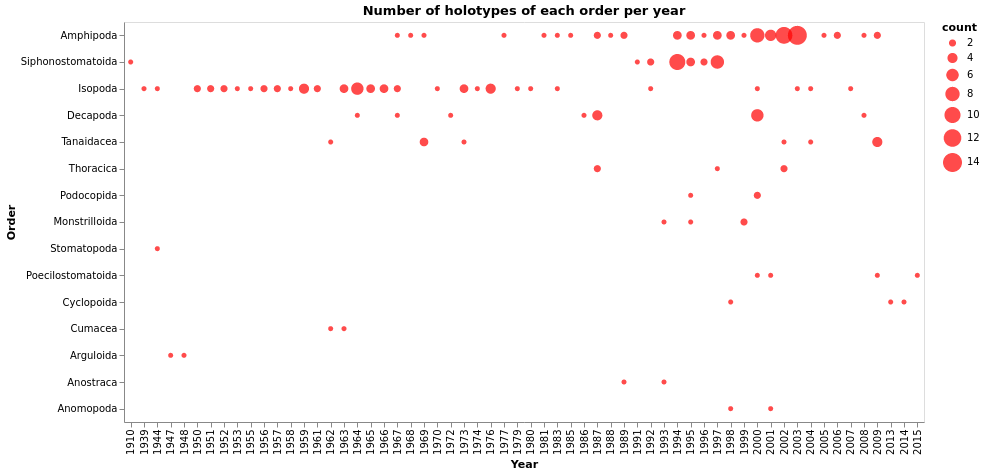

In [32]:
g1 = alt.Chart(temp[temp['order'] != 'Nan'],
               width=800, height=400, title='Number of holotypes of each order per year').mark_circle(size=60,
                                                                                color='red').encode(
    x= alt.X('start_year', type='ordinal', title='Year'),
    y= alt.Y('order', type='nominal', title='Order',
            sort= alt.EncodingSortField(field='count', op='max', order='descending')),
    size = alt.Size('count'),
)

# saving graph
# g1.save(f'./types/counts_per_year/holotypes_per_order.svg')
# g1.save(f'./types/counts_per_year/holotypes_per_order.png')
# g1.save(f'./types/counts_per_year/holotypes_per_order.html')

g1

### separating and grouping types

In [31]:
types = teste1['type_status'].unique()

group_types = []
for t in types:
    if t not in ['Holotipo', 'Alotipo', 'Paratipo']:
        group_types.append(t)

In [32]:
# replicating for ALL types
for t in ['Holotipo', 'Alotipo', 'Paratipo']:
    # preparing data
    temp1 = teste1[(teste1['type_status'] == t)].copy()                   # filtering only holotype
    temp = temp1[~temp1['determiner_first_and_last_name'].isna()].copy()  # making sure names are 
                                                                          # nonempty...
    # sorting
    temp.sort_values('holotipo_year', inplace=True)

    # sorting per holotipo year
    names_ordering = list(temp['determiner_first_and_last_name'].values)
    
    # grouping and counting per order and year
    temp = temp.groupby(['order','start_year']).count()['count'].reset_index()

    ### Chart
    g1 = alt.Chart(temp[temp['order'] != 'Nan'],
                   width=800, height=400, title=f'Number of {t} of each order per year').mark_circle(size=60,
                                                                     color=f'{type_color[t]}').encode(
        x= alt.X('start_year', type='ordinal', title='Year'),
        y= alt.Y('order', type='nominal', title='Order',
                sort= alt.EncodingSortField(field='count', op='max', order='descending')),
        size = alt.Size('count'),
    #     color= alt.Color('holotipo_year', type='quantitative', scale= alt.Scale(scheme='reds')), 
    #     opacity= alt.Opacity(scale= alt.Scale(domain=types,range=opacities), type='quantitative')
    #     size=alt.Size('depth')
    )

    # saving graph
#     g1.save(f'./types/counts_per_year/{t}_per_order.svg')
#     g1.save(f'./types/counts_per_year/{t}_per_order.png')
#     g1.save(f'./types/counts_per_year/{t}_per_order.html')

# g1

<br>

#### graph of other types

In [33]:
t = teste1['order'].unique()

In [34]:
temp = teste1[(teste1['order'] != 'Nan') & (teste1['type_status'].isin(group_types))]
temp = temp.groupby(['order','start_year','type_status']).count()['count'].reset_index()

In [36]:
colors = ['']

<font color='red' size='5'>**p.s.:** temporary adjustment!!!! </font>

I'm grouping (replacing) `Material tipo` and `co-tipo` in (for) `tipo`.

In [53]:
temp['type_status'] = temp['type_status'].str.replace('Material tipo', 'Tipo')
temp['type_status'] = temp['type_status'].str.replace('Topotipo', 'Tipo')
temp['type_status'] = temp['type_status'].str.replace('Co-tipo', 'Tipo')

**graph**

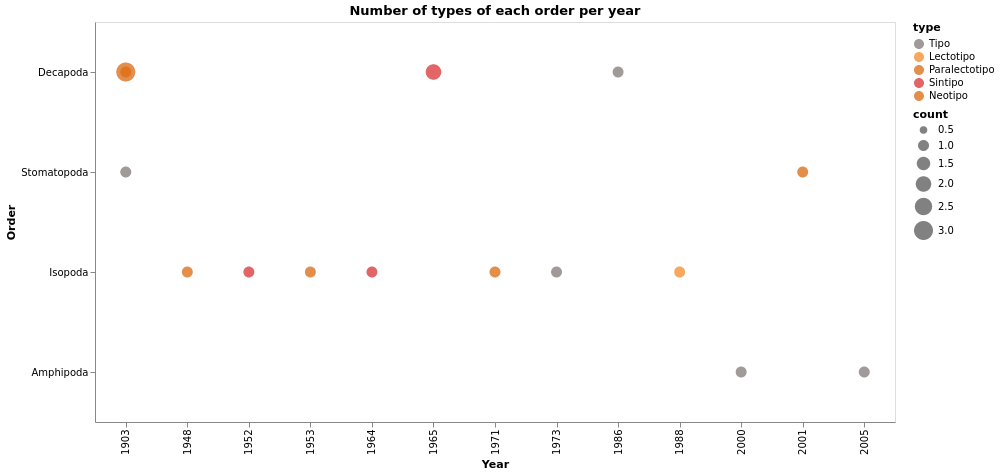

In [55]:
# making graph for other types (group_types)
g1 = alt.Chart(temp,
               width=800, height=400, title='Number of types of each order per year').mark_circle(
                                                                                size=60).encode(
    x= alt.X('start_year', type='ordinal', title='Year'),
    y= alt.Y('order', type='nominal', title='Order',
            sort= alt.EncodingSortField(field='count', op='max', order='descending')),
    color= alt.Color('type_status', title='type',
                     scale= alt.Scale(domain= list(temp['type_status'].unique()),
                                      range=[type_color[t] for t in list(temp['type_status'].unique())])),
    size = alt.Size('count', type='quantitative', scale = alt.Scale(type='bin-ordinal')),
)

# saving graph
# g1.save(f'./types/counts_per_year/other-types_per_order.svg')
# g1.save(f'./types/counts_per_year/other-types_per_order.png')
# g1.save(f'./types/counts_per_year/other-types_per_order.html')

g1

<br>

## New proposal

compare: Year in which the holotype was discovered v.s. Year in which it was firstly cataloged in the Museum

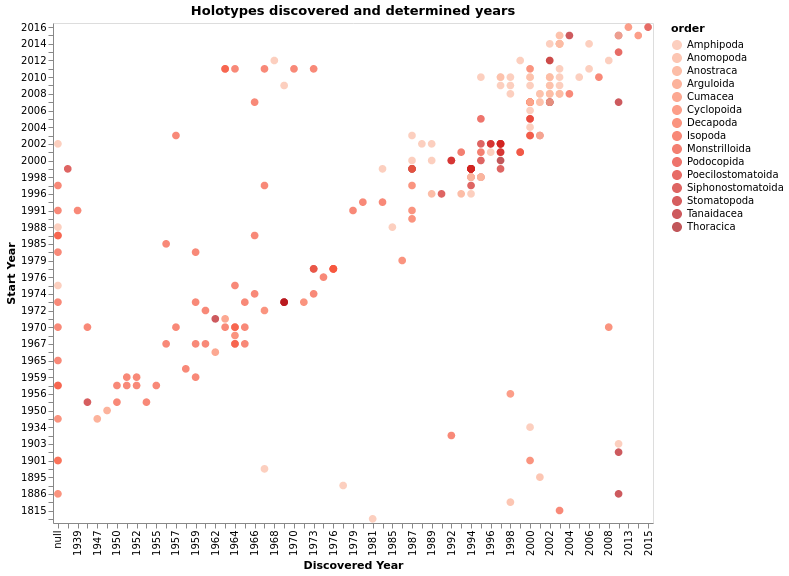

In [52]:
# p.s.: there are overlapping points (it's affecting opacity)
g1 = alt.Chart(holotipo, title='Holotypes discovered and determined years',
               width=600, height=500).mark_circle(size=60).encode(
    x= alt.X('start_year', type='ordinal', title='Discovered Year'),
    y= alt.Y('holotipo_year', type='ordinal', title='Start Year',
            sort= alt.EncodingSortField(field='holotipo_year', order='descending')),
    tooltip= alt.Tooltip(['holotipo_year', 'start_year']),
    color= alt.Color('order', type='nominal', scale= alt.Scale(scheme='reds')), 
#     opacity= alt.Opacity(scale= alt.Scale(domain=types,range=opacities), type='quantitative')
#     size=alt.Size('depth')
)

# saving graph
# g1.save(f'./types/holotipo_discoreved_vs_start_year.svg')
# g1.save(f'./types/holotipo_discoreved_vs_start_year.png')
# g1.save(f'./types/holotipo_discoreved_vs_start_year.html')

g1

<br>

**The end!**

-----